<a href="https://colab.research.google.com/github/Thota-naga-venkata-pramod/machinelearning_linear1/blob/master/simple_linear2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [157]:
x=pd.read_csv("/content/singlelinear.csv")

In [158]:
x

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [159]:
reg=linear_model.LinearRegression()    
reg.fit(x[['area']],x.price) #.fit() used to fit the model

LinearRegression()

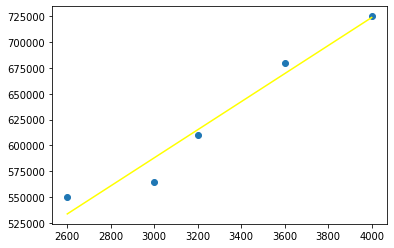

In [160]:
%matplotlib inline
plt.scatter(x.area,x.price)
plt.plot(x.area,reg.predict(x[['area']]),color='yellow')

In [161]:
reg.predict([[6000]])  #y=mx+c  #y    #x=6000



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([995342.46575342])

In [162]:
reg.coef_        #m

array([135.78767123])

In [163]:
reg.intercept_    #c

180616.43835616432

In [164]:
y=pd.read_csv("/content/singlelinear2.csv")
y

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [165]:
new=reg.predict(y)


In [166]:
y['price of predicted']=new

In [167]:
y

,area,price of predicted
0,2600,533664.383562
1,3000,587979.452055
2,3200,615136.986301
3,3600,669452.054795
4,4000,723767.123288


In [168]:
y['result'] = x['price']  #adding the price column to the singlelinear2
y= y.rename(columns={'result': 'actual price'})# renaming the column
y

,area,price of predicted,actual price
0,2600,533664.383562,550000
1,3000,587979.452055,565000
2,3200,615136.986301,610000
3,3600,669452.054795,680000
4,4000,723767.123288,725000


#From now we are calculating residuals

In [169]:
import statsmodels.api as sm

X = y['area']  # independent variable
y = y['actual price']   # dependent variable

# fit the regression model
reg = sm.OLS(y, X).fit()

# to get output summary, use reg.summary()
reg.resid


0    56823.144105
1    -4050.218341
2     3013.100437
3    -2860.262009
4   -33733.624454
dtype: float64